In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### read data

In [ ]:
df = pd.read_csv('madaline.csv', header=None)
df.head()

,0,1,2
0,0.459694,-0.470583,0.0
1,0.797385,-0.343030,0.0
2,0.235270,0.961296,0.0
3,0.765453,-0.177644,0.0
4,-0.335577,-0.313893,0.0


### visualize method

In [ ]:
def vis_data_classifier(data, w, b, x_label, y_label):
  x = list(data[0])
  y = list(data[1])
  map_class = {'0' : 0, '1' : 1}
  c = [i for i in list(data[2])]
  plt.figure(figsize=(6,6))
  x_range = np.linspace(-1.5, 1.5, 500)
  for j, v in enumerate(w):
    y_range = [(0-b[j]-(v[0]*i))/v[1] for i in x_range]
    xo = []
    yo = []
    for i in range(len(x_range)):
      if -1.5<=y_range[i]<=1.5:
        xo.append(x_range[i])
        yo.append(y_range[i])
    plt.plot(xo, yo, label='classifier 1')
  legend1 = plt.legend(loc='lower left')
  scatter = plt.scatter(x, y, c=c)
  plt.legend(handles=scatter.legend_elements()[0], labels=list(map_class.keys()), loc='upper right')
  plt.gca().add_artist(legend1)
  plt.title('perceptron classification according to (x1 , x2) features')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

### define x, y

In [ ]:
y = list(df[2])
x = df.drop([2], axis=1)

### Madaline with 4 line

In [ ]:
def cal_cost(x, y, w, b):
    return 0.5*sum(((np.dot(x,w)+b)-y)**2)

def active(x):
  if x >= 0:
    return 1
  else:
    return -1

def all_cost(x, y, ws, bs, v, bo, n):
  res = 0
  for i, s in enumerate(x):
      nets = [np.dot(s,ws[i])+bs[i] for i in range(n)]
      zs = [active(nets[i]) for i in range(n)]
      yout = active(np.dot(np.array(zs),np.array(v))+bo)
      t = -1 if y[i] == 0 else 1
      res += (yout-t)**2
  return res/2

def learn(x, y, n=4, a=0.005, tol=3e-8, w=[]):
  v = [2/float(n) for i in range(n)]
  bo = 1.8
  ws = []
  if w == []:
    ws = [np.array([(2*np.random.rand()-1),(2*np.random.rand()-1)]) for j in range(n)]
  else:
    ws = w

  bs = [np.random.rand() for i in range(n)]

  epoch_count = 0
  tols = tol*np.ones(3*n)
  cost = all_cost(x, y, ws, bs, v, bo, n)

  while True:
    print('epoch ', epoch_count)
    epoch_count += 1
    ws_cop = ws.copy()
    bs_cop = bs.copy()
    for i, s in enumerate(x):
      nets = [np.dot(s,ws[i])+bs[i] for i in range(n)]
      zs = [active(nets[i]) for i in range(n)]
      yout = active(np.dot(np.array(zs),np.array(v))+bo)
      if yout == -1:
        yout = 0
      if yout != y[i]:
        if y[i] == 0:
          for j in range(n):
            if zs[j] == 1:
              t = -1 if y[i] == 0 else 1
              ws[j] = ws[j] + a*(t-nets[j])*s
              bs[j] = bs[j] + a*(t-nets[j])
        else:
          j = np.argmin(np.array(nets)**2)
          t = -1 if y[i] == 0 else 1
          ws[j] = ws[j] + a*(t-nets[j])*s
          bs[j] = bs[j] + a*(t-nets[j])
    
    bs_diff = np.abs(np.array(bs)-np.array(bs_cop))
    ws_diff = np.array([item for sublist in np.abs(np.array(ws)-np.array(ws_cop)) for item in sublist])

    cost = all_cost(x, y, ws, bs, v, bo, n)
    print('diff cost: ', cost)
    if not (np.concatenate((ws_diff, bs_diff), axis=0)>tols).any() or epoch_count > 100:
      break

  return ws, bs, v, bo

In [ ]:
def pred(ws, bs, v, bo, n, x, y):
  res = []
  for i, s in enumerate(x):
      nets = [np.dot(s,ws[i])+bs[i] for i in range(n)]
      zs = [active(nets[i]) for i in range(n)]
      yout = active(np.dot(np.array(zs),np.array(v))+bo)
      yout = 0 if yout == -1 else 1 
      res.append(yout)

  return res

In [ ]:
w_l, b_l, v, bo = learn(x.values, y, n=4, a=0.05)

epoch  0
diff cost:  62.0
epoch  1
diff cost:  40.0
epoch  2
diff cost:  24.0
epoch  3
diff cost:  26.0
epoch  4
diff cost:  56.0
epoch  5
diff cost:  30.0
epoch  6
diff cost:  62.0
epoch  7
diff cost:  64.0
epoch  8
diff cost:  56.0
epoch  9
diff cost:  54.0
epoch  10
diff cost:  52.0
epoch  11
diff cost:  48.0
epoch  12
diff cost:  50.0
epoch  13
diff cost:  48.0
epoch  14
diff cost:  48.0
epoch  15
diff cost:  48.0
epoch  16
diff cost:  48.0
epoch  17
diff cost:  48.0
epoch  18
diff cost:  48.0
epoch  19
diff cost:  46.0
epoch  20
diff cost:  46.0
epoch  21
diff cost:  54.0
epoch  22
diff cost:  38.0
epoch  23
diff cost:  66.0
epoch  24
diff cost:  40.0
epoch  25
diff cost:  38.0
epoch  26
diff cost:  52.0
epoch  27
diff cost:  78.0
epoch  28
diff cost:  46.0
epoch  29
diff cost:  46.0
epoch  30
diff cost:  44.0
epoch  31
diff cost:  46.0
epoch  32
diff cost:  26.0
epoch  33
diff cost:  24.0
epoch  34
diff cost:  56.0
epoch  35
diff cost:  18.0
epoch  36
diff cost:  46.0
epoch  37
d

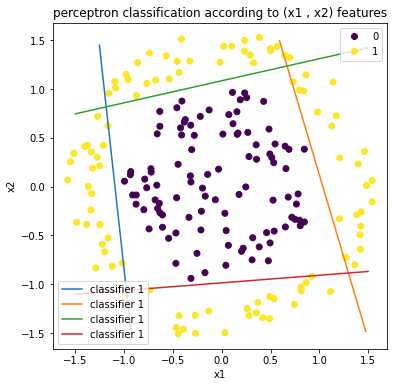

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
from sklearn.metrics import classification_report

vis_data_classifier(df, w_l, b_l, 'x1', 'x2')
y_pred = pred(w_l, b_l, v, bo, 4, x.values, y)
print(classification_report(y, y_pred))

### 6 line 

epoch  0
diff cost:  200.0
epoch  1
diff cost:  200.0
epoch  2
diff cost:  200.0
epoch  3
diff cost:  190.0
epoch  4
diff cost:  164.0
epoch  5
diff cost:  124.0
epoch  6
diff cost:  102.0
epoch  7
diff cost:  80.0
epoch  8
diff cost:  58.0
epoch  9
diff cost:  42.0
epoch  10
diff cost:  34.0
epoch  11
diff cost:  24.0
epoch  12
diff cost:  20.0
epoch  13
diff cost:  16.0
epoch  14
diff cost:  14.0
epoch  15
diff cost:  12.0
epoch  16
diff cost:  8.0
epoch  17
diff cost:  8.0
epoch  18
diff cost:  8.0
epoch  19
diff cost:  8.0
epoch  20
diff cost:  8.0
epoch  21
diff cost:  8.0
epoch  22
diff cost:  8.0
epoch  23
diff cost:  8.0
epoch  24
diff cost:  6.0
epoch  25
diff cost:  6.0
epoch  26
diff cost:  6.0
epoch  27
diff cost:  4.0
epoch  28
diff cost:  4.0
epoch  29
diff cost:  4.0
epoch  30
diff cost:  4.0
epoch  31
diff cost:  4.0
epoch  32
diff cost:  2.0
epoch  33
diff cost:  2.0
epoch  34
diff cost:  0.0
epoch  35
diff cost:  0.0


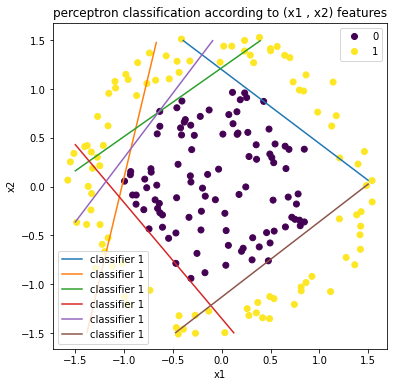

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
w_l, b_l, v, bo = learn(x.values, y, a=0.002,n=6)
vis_data_classifier(df, w_l, b_l, 'x1', 'x2')
y_pred = pred(w_l, b_l, v, bo, 6, x.values, y)
print(classification_report(y, y_pred))

### line 8

epoch  0
diff cost:  178.0
epoch  1
diff cost:  48.0
epoch  2
diff cost:  18.0
epoch  3
diff cost:  8.0
epoch  4
diff cost:  2.0
epoch  5
diff cost:  2.0
epoch  6
diff cost:  2.0
epoch  7
diff cost:  0.0
epoch  8
diff cost:  0.0


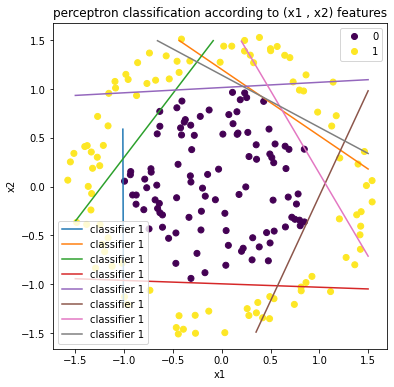

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
w_l, b_l, v, bo = learn(x.values, y, a=0.01,n=8)
y_pred = pred(w_l, b_l, v, bo, 8, x.values, y)
vis_data_classifier(df, w_l, b_l, 'x1', 'x2')
print(classification_report(y, y_pred))